# DRUGCOMBDB
http://drugcombdb.denglab.org/download 
Hemos descargado alguno de los csv de donwloads

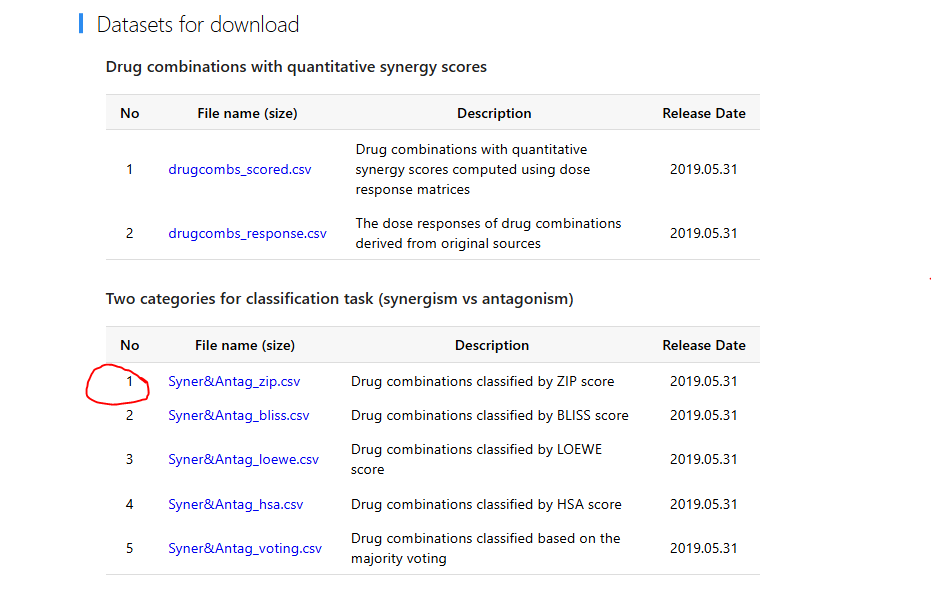

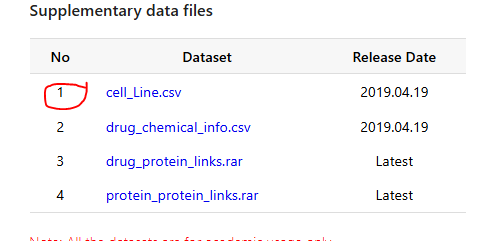

In [3]:
import pandas as pd
# Load the CSV files and the Excel file to analyze their structure
cell_line_path = "C:/Users/Usuario/Desktop/TFM/datos/drugcombdb/cell_Line.csv"
syn_antag_voting_path = "C:/Users/Usuario/Desktop/TFM/datos/drugcombdb/Syner&Antag_voting.csv"
#syn_drug_comb_external_path = "/mnt/data/SynDrugComb_external.xlsx"

# Read the files
df_cell_line = pd.read_csv(cell_line_path)
df_syn_antag_voting = pd.read_csv(syn_antag_voting_path)
#df_syn_drug_comb_external = pd.read_excel(syn_drug_comb_external_path, None)  # Load all sheets


In [4]:
df_cell_line

,cellName,cosmicId,tag
0,786-0,905947.0,NaN
1,A498,905948.0,NaN
2,A549/ATCC,905949.0,NaN
3,ACHN,905950.0,NaN
4,CCRF-CEM,905952.0,NaN
...,...,...,...
99,COLO 858,NaN,人黑色素瘤
100,WM-115,909784.0,NaN
101,MMAC-SF,925339.0,NaN
102,MZ7-mel,753596.0,NaN


## 1) Probar con lineas celulares que sabemos que estan relacionadas con glioblastoma 

segun chat lineas celulr de glioblastoma: referencia https://www.revvity.com/de-en/ask/nci-60-cancer-cell-lines?


No hay niguna relacionada con glioblastoma

In [6]:
##probamos con las lineas celulares de andrea
glioblastoma_related = df_syn_antag_voting[
    df_syn_antag_voting["Cell line"].str.contains("SHSY5Y|ND30625", case=False, na=False)
]
glioblastoma_related

,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,HSA,ZIPclassification,blissclassification,loeweclassification,hsaclassification,synthetic,classification


In [7]:
##probamos con las lineas celulares de chat 
glioblastoma_related = df_syn_antag_voting[
    df_syn_antag_voting["Cell line"].str.contains("SF268|SF295|SF539|SNB19|SNB75", case=False, na=False)
]
glioblastoma_related

,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,HSA,ZIPclassification,blissclassification,loeweclassification,hsaclassification,synthetic,classification


## 2) Intentar aosciador tejidos a tipos de cancer y ver si hay alguno de glioblastoma 

https://www.cellosaurus.org/CVCL_1051 buscar por cellosaurus la api y añadir alomejor el sitio 

https://cancer.sanger.ac.uk/cosmic/sample/overview?id=905947 

al final lo que he hecho es correr el webscrapping y los que no se me anotaban lo he hecho a mano y lo he guardado 


In [8]:
# Create a backup of the original DataFrame
df_original = df_cell_line.copy()


In [9]:
df_cell_line

,cellName,cosmicId,tag
0,786-0,905947.0,NaN
1,A498,905948.0,NaN
2,A549/ATCC,905949.0,NaN
3,ACHN,905950.0,NaN
4,CCRF-CEM,905952.0,NaN
...,...,...,...
99,COLO 858,NaN,人黑色素瘤
100,WM-115,909784.0,NaN
101,MMAC-SF,925339.0,NaN
102,MZ7-mel,753596.0,NaN


In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import random

# Definir headers para simular un navegador real
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://cancer.sanger.ac.uk/cosmic/"
}

# Función para obtener la ubicación del tumor
def get_tumour_location(cosmic_id):
    url = f"https://cancer.sanger.ac.uk/cosmic/sample/overview?id={cosmic_id}"
    
    try:
        response = requests.get(url, headers=headers, timeout=5)  # Espera hasta 5 segundos antes de fallar
    except requests.exceptions.RequestException as e:
        return f"Error en la solicitud: {e}"
    
    if response.status_code != 200:
        return "no deja acceder"  # Indica que el acceso fue denegado
    
    soup = BeautifulSoup(response.text, "html.parser")
    # Buscar el campo "Tumour location"
    match = re.search(r"Tumour location\s*(.*?)\s*View this tissue/histology", soup.get_text(), re.DOTALL)
    
    return match.group(1).strip() if match else None


In [13]:
# Temporarily drop NaN values in cosmicId
df_valid = df_cell_line.dropna(subset=["cosmicId"]).copy()

# Convert cosmicId to int (ensuring only valid IDs are processed)
df_valid["cosmicId"] = df_valid["cosmicId"].astype(int)


df_valid = df_valid.sample(frac=1).reset_index(drop=True)  # Mezclar filas aleatoriamente
df_valid["tumour_location"] = df_valid["cosmicId"].apply(get_tumour_location)

In [14]:
df_valid.head(20)

,cellName,cosmicId,tag,tumour_location
0,NCI/ADR-RES,905987,NCI-ADR-RES,Ovary (Carcinoma)
1,LNCAP,907788,LNCaP-Clone-FGC,Prostate (Carcinoma; Adenocarcinoma)
2,OVCAR-8,905991,NaN,Ovary (Carcinoma)
3,SW-620,905962,SW620,Large intestine; Colon (Carcinoma; Adenocarcin...
4,MMAC-SF,925339,NaN,Skin (Malignant melanoma)
5,786-0,905947,NaN,Kidney (Carcinoma; Clear cell renal cell carci...
6,PC-3,905934,NaN,Prostate (Carcinoma; Adenocarcinoma)
7,NCI-H522,905944,NaN,Lung (Carcinoma; Non small cell carcinoma)
8,T-47D,905945,T47D,Breast (Carcinoma; Ductal carcinoma)
9,HL-60(TB),905938,HL-60,Haematopoietic and lymphoid (Haematopoietic ne...


In [15]:
none_count = df_valid["tumour_location"].isna().sum()
none_count

np.int64(5)

In [11]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado df
df_valid.to_csv("C:/Users/Usuario/Desktop/TFM/datos/drugcombdb/cell_Line_name.csv", index=False)  # Guarda sin el índice


NameError: name 'df_valid' is not defined

**EJECUTAR DESDE AQUI**

In [12]:
cell_line_path = "C:/Users/Usuario/Desktop/TFM/datos/drugcombdb/cell_Line_name.csv"
df_cell_line_name = pd.read_csv(cell_line_path,sep=";")


In [13]:
df_cell_line_name

,cellName,cosmicId,tag,tumour_location
0,T-47D,905945,T47D,Breast (Carcinoma; Ductal carcinoma)
1,NCI/ADR-RES,905987,NCI-ADR-RES,Ovary (Carcinoma)
2,NCIH520,908443,NCI-H520,Lung (Carcinoma; Squamous cell carcinoma)
3,SW-620,905962,SW620,Large intestine; Colon (Carcinoma; Adenocarcin...
4,ES2,1240128,ES-2,NaN
...,...,...,...,...
91,COLO 205,905961,COLO-205,Large intestine; Colon (Carcinoma; Adenocarcin...
92,MDA-MB-468,908123,NaN,Breast (Carcinoma)
93,RXF 393,905978,RXF393,Kidney (Carcinoma; Renal cell carcinoma)
94,OVCAR-3,905933,NaN,Ovary (Carcinoma; Adenocarcinoma)


In [14]:
none_count = df_cell_line_name["tumour_location"].isna().sum()
none_count

np.int64(5)

filtrar por las que tengan algo que ver con nervioso: 6

In [15]:
# Filtering rows where 'tumour_location' contains "nervous" (case insensitive)
df_filtered = df_cell_line_name[df_cell_line_name["tumour_location"].str.contains("nervous", case=False, na=False)]

In [16]:
df_filtered

,cellName,cosmicId,tag,tumour_location
10,SNB-19,905966,SNB19,Central nervous system; Cerebrum (Glioma; Astr...
33,SF-539,905984,SF539,Central nervous system; Brain (Glioma)
71,SF-295,905985,SF295,Central nervous system; Brain (Glioma)
78,U251,905983,NaN,Central nervous system; Brain (Glioma)
82,SF-268,905986,SF268,Central nervous system; Brain (Glioma)
86,SNB-75,905982,SNB75,Central nervous system; Brain (Glioma)


## 3) Analisis de combinaciones

He visto que realmente no hay ninguna cell line s que se corresponda con nuestra lista, es decir que no pone glioblastoma. Pero bueno, el csv  de abajo se puede usar para analizar otras lineas de cancer 

Se podría preguntar al man si tiene infromación de la disease para el que esta targeteado todo

---- 

In [17]:
df_syn_antag_voting

,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,HSA,ZIPclassification,blissclassification,loeweclassification,hsaclassification,synthetic,classification
0,1,5-FU,ABT-888,A2058,5.880,12.330,3.330,11.610,1,1,1,1,4,synergy
1,2,5-FU,ABT-888,A2058,3.590,11.660,2.650,10.940,1,1,1,1,4,synergy
2,3,5-FU,AZD1775,A2058,12.290,15.770,10.400,18.660,1,1,1,1,4,synergy
3,4,5-FU,AZD1775,A2058,7.640,6.520,1.150,9.410,1,1,1,1,4,synergy
4,5,5-FU,AZD1775,A2058,14.790,15.180,9.810,18.070,1,1,1,1,4,synergy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240971,240972,Efavirenz,ibrutinib,TMD8,-1.174,-4.829,-37.481,-4.409,-1,-1,-1,-1,-4,antagonism
240972,240973,Ivachtin,ibrutinib,TMD8,-2.095,-4.509,-25.827,-3.191,-1,-1,-1,-1,-4,antagonism
240973,240974,NCGC00262398,ibrutinib,TMD8,-3.170,-5.464,-24.472,-2.288,-1,-1,-1,-1,-4,antagonism
240974,240975,BTM-2C-dimer ketone,ibrutinib,TMD8,4.714,1.845,0.884,8.416,1,1,1,1,4,synergy


numero de drugs

In [23]:
df_cleaned = df_syn_antag_voting.dropna(subset=["Drug1", "Drug2"])
unique_drugs = pd.unique(df_cleaned[["Drug1", "Drug2"]].values.ravel("K"))
print('Original number of combinations',df_syn_antag_voting.shape[0] ,'number of non nan values in drugs',df_cleaned.shape[0], 'number of different drugs: ' ,len(unique_drugs))

Original number of combinations 240976 number of non nan values in drugs 240974 number of different drugs:  4657


numero de combinaciones

In [26]:
# Creating a temporary variable with the sorted combination of both drugs
df_cleaned["drug_combination"] = df_cleaned.apply(lambda row: "-".join(sorted([row["Drug1"], row["Drug2"]])), axis=1)

# Dropping duplicate drug combinations
df_unique_combinations = df_cleaned.drop_duplicates(subset=["drug_combination"])

# Dropping the temporary variable
df_unique_combinations = df_unique_combinations.drop(columns=["drug_combination"])

# Counting the unique drug combinations
print('Original number of combinations',df_syn_antag_voting.shape[0] ,'Número de combinaciones diferentes: ', len(df_unique_combinations))

Original number of combinations 240976 Número de combinaciones diferentes:  55363


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5884\2168350512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["drug_combination"] = df_cleaned.apply(lambda row: "-".join(sorted([row["Drug1"], row["Drug2"]])), axis=1)


ahora vamos a ver cuantas combinaciones hay con las cell lines del sistema nervioso

In [29]:
##probamos con las lineas celulares de andrea
glioblastoma_related = df_unique_combinations[
    df_unique_combinations["Cell line"].str.contains("SNB-19|SF-539|SF-295|U251|SF-268|SNB-75", case=False, na=False)
]
print('Numero de combinaciones únicas que estan relaccionadas con lineas celulares del sistema nervioso: ', glioblastoma_related.shape[0])

Numero de combinaciones únicas que estan relaccionadas con lineas celulares del sistema nervioso:  454


In [32]:
unique_drugs_glioblastoma = pd.unique(glioblastoma_related[["Drug1", "Drug2"]].values.ravel("K"))
print('Numner of drugs related to CNS: ', len(unique_drugs_glioblastoma))

Numner of drugs related to CNS:  102


numero de cell lines

In [27]:
num_unique_cell_lines = df_syn_antag_voting["Cell line"].nunique()
print('Number fo different cell lines', num_unique_cell_lines)

Number fo different cell lines 119
